Epoch: 100; Error: 0.3529470823070936;
Epoch: 200; Error: 0.19174308126850229;
Epoch: 300; Error: 0.17466064018358424;
Epoch: 400; Error: 0.0416185567375722;
Epoch: 500; Error: 0.033250998000130344;
Epoch: 600; Error: 0.16713656147656653;
Epoch: 700; Error: 0.02835796717663825;
Epoch: 800; Error: 0.026086548815392463;
Epoch: 900; Error: 0.024343229702253517;
Epoch: 1000; Error: 0.02336034670089171;
Epoch: 1100; Error: 0.02190720247684376;
Epoch: 1200; Error: 0.02178064509789265;
The maximum number of train epochs is reached


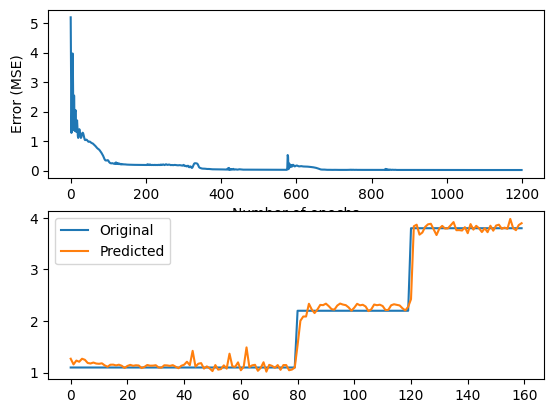

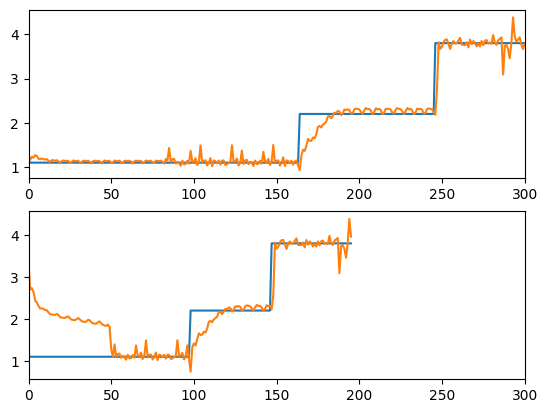

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import neurolab as nl

def get_data(num_points):
    # Create sine waveforms
    wave_1 = 0.5 * np.sin(np.arange(0, num_points))
    wave_2 = 3.6 * np.sin(np.arange(0, num_points))
    wave_3 = 1.1 * np.sin(np.arange(0, num_points))
    wave_4 = 4.7 * np.sin(np.arange(0, num_points))

    # Create varying amplitudes
    amp_1 = .1+ np.ones(num_points)
    amp_2 = 1.1 + np.zeros(num_points) 
    amp_3 = 2.2 * np.ones(num_points) 
    amp_4 = 3.8 + np.zeros(num_points) 

    wave = np.array([wave_1, wave_2, wave_3, wave_4]).reshape(num_points * 4, 1)
    amp = np.array([[amp_1, amp_2, amp_3, amp_4]]).reshape(num_points * 4, 1)

    return wave, amp 

# Visualize the output 
def visualize_output(nn, num_points_test):
    wave, amp = get_data(num_points_test)
    output = nn.sim(wave)
    plt.plot(amp.reshape(num_points_test * 4))
    plt.plot(output.reshape(num_points_test * 4))

if __name__=='__main__':
    # Create some sample data
    num_points = 40
    wave, amp = get_data(num_points)

    # Create a recurrent neural network with 2 layers
    nn = nl.net.newelm([[-2, 2]], [10, 1], [nl.trans.TanSig(), nl.trans.PureLin()])

    # Set the init functions for each layer 
    nn.layers[0].initf = nl.init.InitRand([-0.1, 0.1], 'wb')
    nn.layers[1].initf = nl.init.InitRand([-0.1, 0.1], 'wb')
    nn.init()

    # Train the recurrent neural network
    error_progress = nn.train(wave, amp, epochs=1200, show=100, goal=0.01)

    # Run the training data through the network
    output = nn.sim(wave)

    # Plot the results
    plt.subplot(211)
    plt.plot(error_progress)
    plt.xlabel('Number of epochs')
    plt.ylabel('Error (MSE)')

    plt.subplot(212)
    plt.plot(amp.reshape(num_points * 4))
    plt.plot(output.reshape(num_points * 4))
    plt.legend(['Original', 'Predicted'])

    # Testing the network performance on unknown data 
    plt.figure()

    plt.subplot(211)
    visualize_output(nn, 82)
    plt.xlim([0, 300])

    plt.subplot(212)
    visualize_output(nn, 49)
    plt.xlim([0, 300])

    plt.show()
